# 第4章 Python数据分析与可视化
# 4.2 数据预处理

###  4.2.2搜集数据  
数据搜集有很多方法，例如网络下载、调查问卷、实地测量等、实验记录等。可以根据实际问题进行选择。  
  
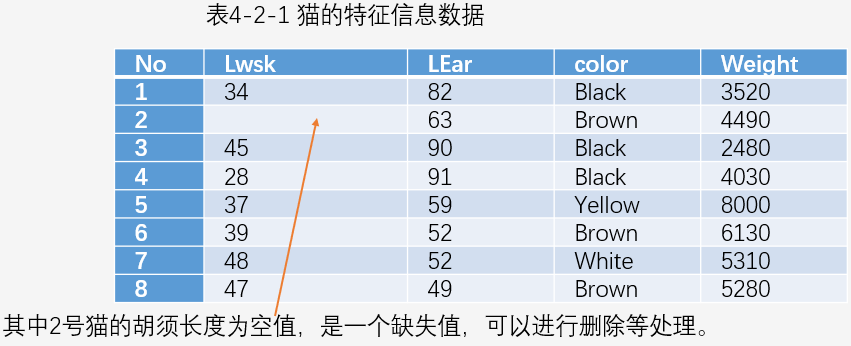  
<br>
<font color=bule>
实际处理中，获取的数据大都存在问题，无法直接使用，需要进行预处理，例如乱码、空值处理、归一化等。<br>
**数据的数量和质量都将决定最终分析结果的好坏。** </font>   

###  4.2.1数据探查

目的： 
- 为了解决数据质量问题
- 让数据更适合做挖掘  

<font color=blue>**数据清洗**</font> ETL包括三个过程：
原始的数据经过一定的处理，放入数据仓库。
- 从数据源中抽取（Extract）：解决的是数据来源问题 ➡ 数据的整合、统一数据格式  
- 进行数据转换（Transform）：根据商业需要，利用规则/方法进行数据处理 ➡ 筛选、清理、合并、拆分、排序、计算
- 数据加载（Load）：数据进入数据仓库 ➡ 全量加载、增量加载  <br>


###  4.2.3数据预处理

常见的预处理方法有采样、去噪、归一化、数据过滤、数据分组等。  
##### （1）采样
采样就是按照某种规则从数据集中挑选样本数据。  
- <font color=blue>随机采样</font>是从被采样数据集中随机地抽取特定数量的数据。随机采样需要指定所需样本数据的数量。  
- <font color=blue>系统采样</font>又称为等距采样，即先将总体的观察单位按某一顺序号分成n个部分，依次用相等间距，从每一部分中各抽取一个样本。系统采样通常用于按照一定顺序排列好的数据。

In [ ]:
#  【例4-10】 对电影评分IMDB300数据集进行随机采样，抽取50条电影数据。教材例程
'''random模块的sample()函数中提供了随机采样功能，可以使用sample随机抽取50条数据。素材文件为“score.txt”。
'''
import random
indexList=[] #电影编号列表
filmList=[]  #电影列表 
file=open('score.txt','r',encoding='UTF-8')
while True:    
    line=file.readline().split('\t')        
    if line==['']:
        break
    else:  
        filmList.append(line)
        
indexList=random.sample(filmList, k=50)
print(indexList)

In [ ]:
#  【例4-10 改写一】 对电影评分IMDB300数据集进行随机采样，抽取50条电影数据。 

import random
indexList=[] #电影编号列表
filmList=[]  #电影列表 
file=open('score.txt','r',encoding='UTF-8')
while True:
    line=file.readline()
    if not line:
        break
    filmList.append(line.split())
file.close()
indexList=random.sample(filmList, k=50) 
print(indexList)

In [ ]:
#  【例4-10 改写二】 对电影评分IMDB300数据集进行随机采样，抽取50条电影数据。 
import random
indexList=[] #电影编号列表
filmList=[]  #电影列表 
with open('score.txt','r',encoding='UTF-8') as file:
    for line in file:
        filmList.append(line.split())
indexList=random.sample(filmList, k=50) 
print(indexList)

#####  （2）数据分组
数据分组也称为数据分区，  
是指根据数据分析对象的特征，按照一定的数值指标，把数据分析对象*划分为不同的区间*部分来进行研究，以揭示其内在的联系和规律性。

##### （3）数据标准化（standardization）
数据分析之前，通常需要先将数据标准化。   
标准化是一种将特征按比例缩放的方法（feature scale），使数值落入一个特定的区间，便于综合分析，比如：比较或加权等。
- 为了消除指标之间的差异的影响  
        取值范围的差异：把特征的各个维度标准化到特定的区间  
        量纲的差异：把原始数据均转换为无量纲化指标测评值
- 但并不会改变原本数值的大小排序关系 

数据标准化处理主要包括：
- *数据同趋化处理* 主要解决不同性质数据问题，使所有数据指标具有相同特性。
- *数据无量纲化处理* 主要解决数据的可比性, 让不同数量级的数据具备可比性。
      常用的有“最小-最大标准化”、“Z-score标准化”和“归一标准化”等。  

##### 归一化 （normalization）
- 是一种数据标准化方法，通常<font color=red><u>*将数据范围压缩到 [0,1]* </u></font>之间，把量纲转为无量纲，方便计算、比较等。     
- 对数值x进行归一化处理，可以使用该列数据（同一特征的数据）的最大、最小值，计算方法为：   
&emsp;&emsp;`（x - 最小值）/（最大值 - 最小值）  ` 


    例如：对表4-2中的猫数据集，其中1号猫的体重x=3520克。接下来观察所有猫的体重数据，得到最小值为2480克，最大值为8000克，进行归一化处理可以得到1号猫的新体重数值w′：
&emsp;&emsp;&emsp;&emsp;`w′=(3520-2480)/(8000-2480)≈0.18841 `

    类似地，还可以计算出1号猫的胡须长数据归一化结果l′：
&emsp;&emsp;&emsp;&emsp;`l′=（34-28）/（48-28）= 0.3 `

In [ ]:
#  【例4-11】 使用素材文件“CatInfo.csv”，对猫数据集的数据进行归一化处理。
'''提示：读取文件，将每一行中的数据逐个归一化处理后，存放到新列表中

什么是DataFrame？
DataFrame是一个表格型的数据结构
DataFrame 含有一组有序的列，每列可以是不同的值类型（数值、字符串、布尔值等）。
DataFrame 有两个方向的标签轴，分别是行标签(index)和列标签(columns)。

pandas.DataFrame.shape :返回数据帧的形状,返回df形状(2,3)  2行3列
pandas.DataFrame.iloc：根据行号/列号取值
'''
import pandas as pd
def MaxMinNormalization(x):
    shapeX = x.shape  
    rows = shapeX[0]   #行数
    cols = shapeX[1]   #列数
    headers=list(x)     #Header行
    #print('#Header行-------',headers)
    result =pd.DataFrame(columns=headers)  #存放结果的空DataFrame
    for i in range(0,rows):        
        dict1={}                        #存放每一行结果的字典
        dict1[headers[0]]=i
        for j in range(1,cols):            
            maxCol=x[headers[j]].max()  #j列最大值
            minCol=x[headers[j]].min()   #j列最小值
            val= (x.iloc[i,j]- minCol)/(maxCol-minCol)  #i行j列数据的归一化结果
            dict1[headers[j]]=val                    
        result=result.append(dict1,ignore_index=True)   #把i行结果添加到result
    return result

data1 = pd.read_csv('CatInfo.csv')
print('original data:\n',data1)
newData=MaxMinNormalization(data1)
print('Normalized data:\n',newData)

In [ ]:
#  【例4-11 改写】 使用素材文件“CatInfo.csv”，对猫数据集的数据进行归一化处理。
import pandas as pd

def MinMaxNormalization(x):
    return (x-x.min())/(x.max()-x.min())   ## 最小-最大标准化

data1 = pd.read_csv('CatInfo.csv')
print('original data:\n',data1)
newData=MinMaxNormalization(data1)
print('MinMax-Normalized data:\n',newData)

In [ ]:
#  【例4-11 改写 首列不变】
import pandas as pd

def MinMaxNormalization2(x):
    firstColumn = x.iloc[:, 0]
    x2 = (x-x.min())/(x.max()-x.min())
    x2[x2.columns[0]] = firstColumn 
    return x2
newData=MinMaxNormalization2(data1)
print('MinMax2-Normalized data:\n',newData)

def ZeroMeanNormalization(x):
    return (x-x.mean())/x.std()   ## 零-均值标准化（均值为0，标准差为1）

DataFrame 结构图示意图:  
表格中展示了某个销售团队个人信息和绩效评级（rating）的相关数据。数据以行和列形式来表示，其中每一列表示一个属性，而每一行表示一个条目的信息。
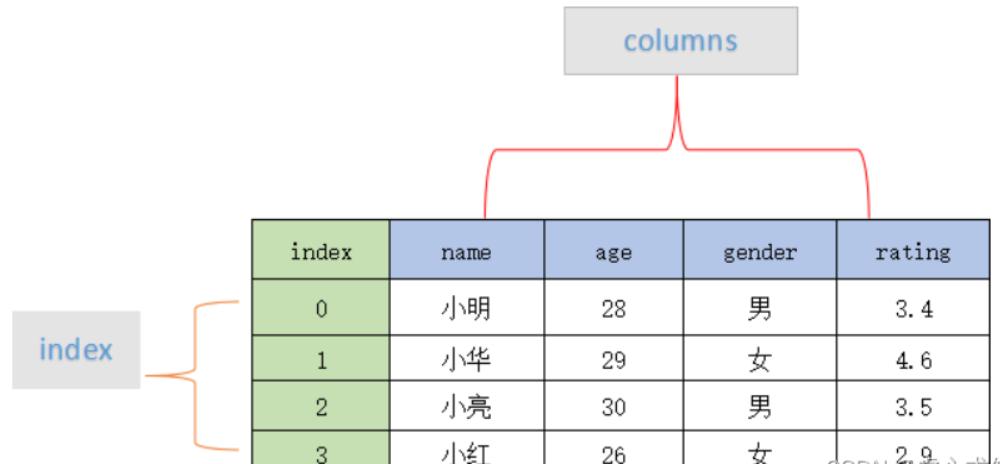